In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn import metrics as m
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels import api as sm
from collections import namedtuple
%matplotlib notebook

In [2]:
warnings.filterwarnings("ignore")

In [3]:
r2 = lambda x: round(x,2)

In [4]:
hd = pd.read_csv("train.csv").iloc[:,1:]

In [5]:
hd.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
hd.shape

(1460, 80)

In [7]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
pc = 0.80

In [9]:
min_null = pc * hd.shape[0] + 1

In [10]:
min_null

1169.0

In [11]:
hd.dropna(       axis=1
                ,thresh=min_null
                ,inplace=True)

In [12]:
hd.shape

(1460, 75)

In [13]:
hd.corr()[(hd.corr() >= 0.65) & (hd.corr() < 1)]["SalePrice"].dropna()

OverallQual    0.790982
GrLivArea      0.708624
Name: SalePrice, dtype: float64

In [14]:
gla = hd.GrLivArea.values.copy()
sp = hd.SalePrice.values.copy()

<IPython.core.display.Javascript object>


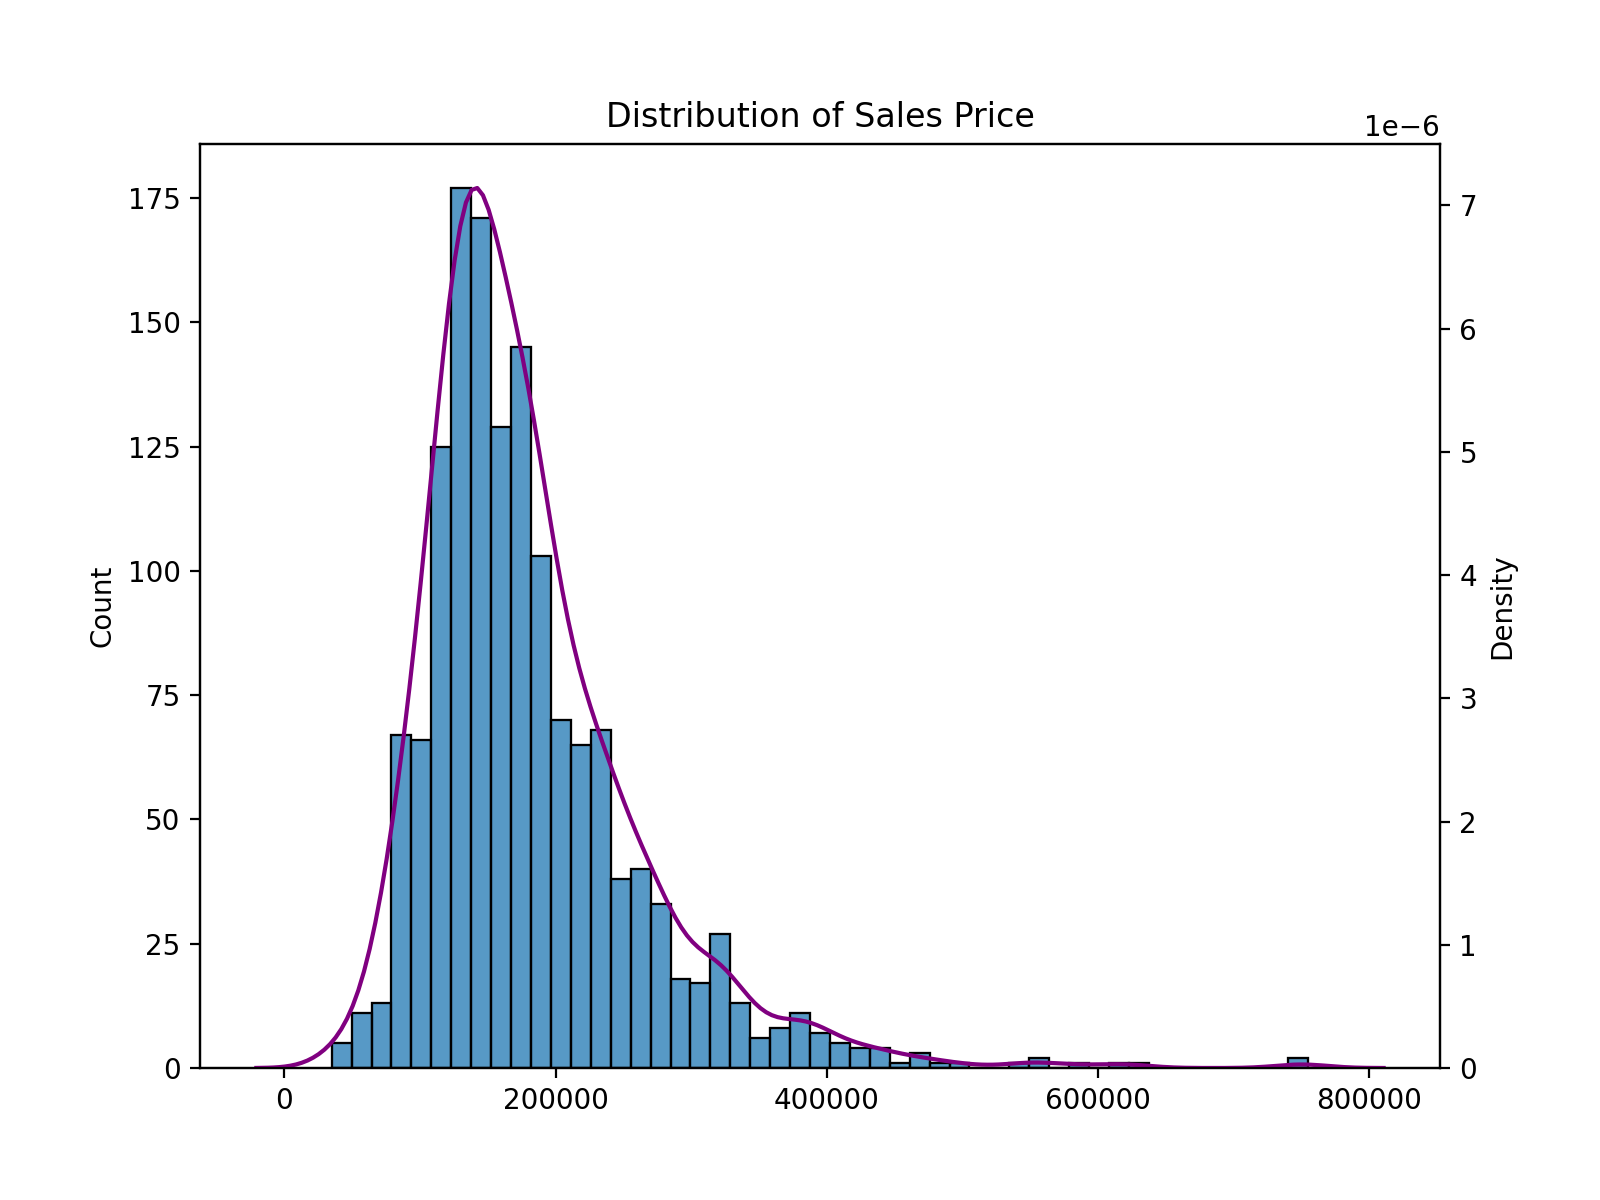

Mean Sales Price: 180921.2
Median Sales Price: 163000.0
Skewness: 1.88


In [15]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x=sp)
ax2 = ax.twinx()
sns.kdeplot(x=sp,color="purple",ax=ax2)
plt.title("Distribution of Sales Price")
plt.xlabel("Sales Price")
plt.show()
print(
        "Mean Sales Price: {}".format(r2(np.mean(sp)))
      + "\n"
      + "Median Sales Price: {}".format(r2(np.median(sp)))
      + "\n"
      + "Skewness: {}".format(r2(stats.skew(sp)))
    )

<IPython.core.display.Javascript object>


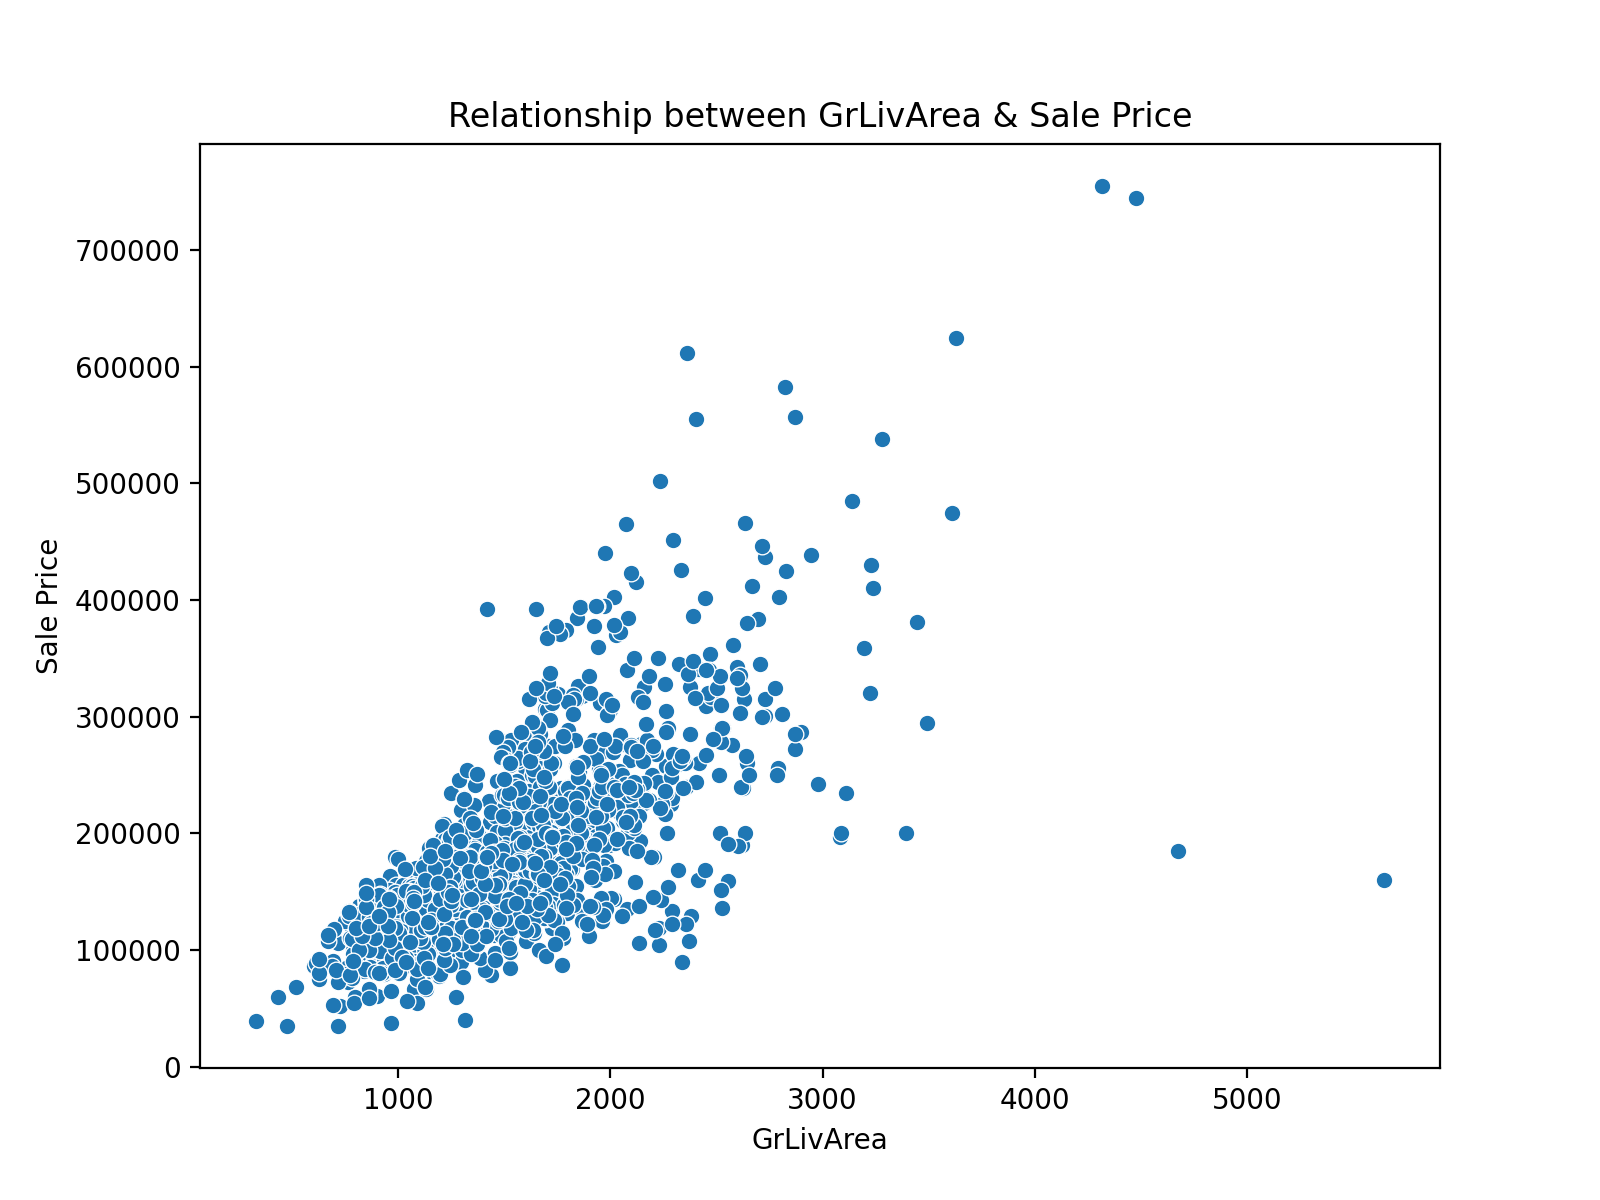

Pearson Corr Coeff: 0.71


In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=gla,y=sp)
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.title("Relationship between GrLivArea & Sale Price")
print("Pearson Corr Coeff: {}".format(r2(stats.pearsonr(gla,sp)[0])))
plt.show()

# Simple Linear Regression

In [17]:
x = gla

y = sp

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=112)

slm = LinearRegression()

slm.fit(X_train.reshape(-1,1),y_train)

ypred = slm.predict(X_test.reshape(-1,1))

<IPython.core.display.Javascript object>


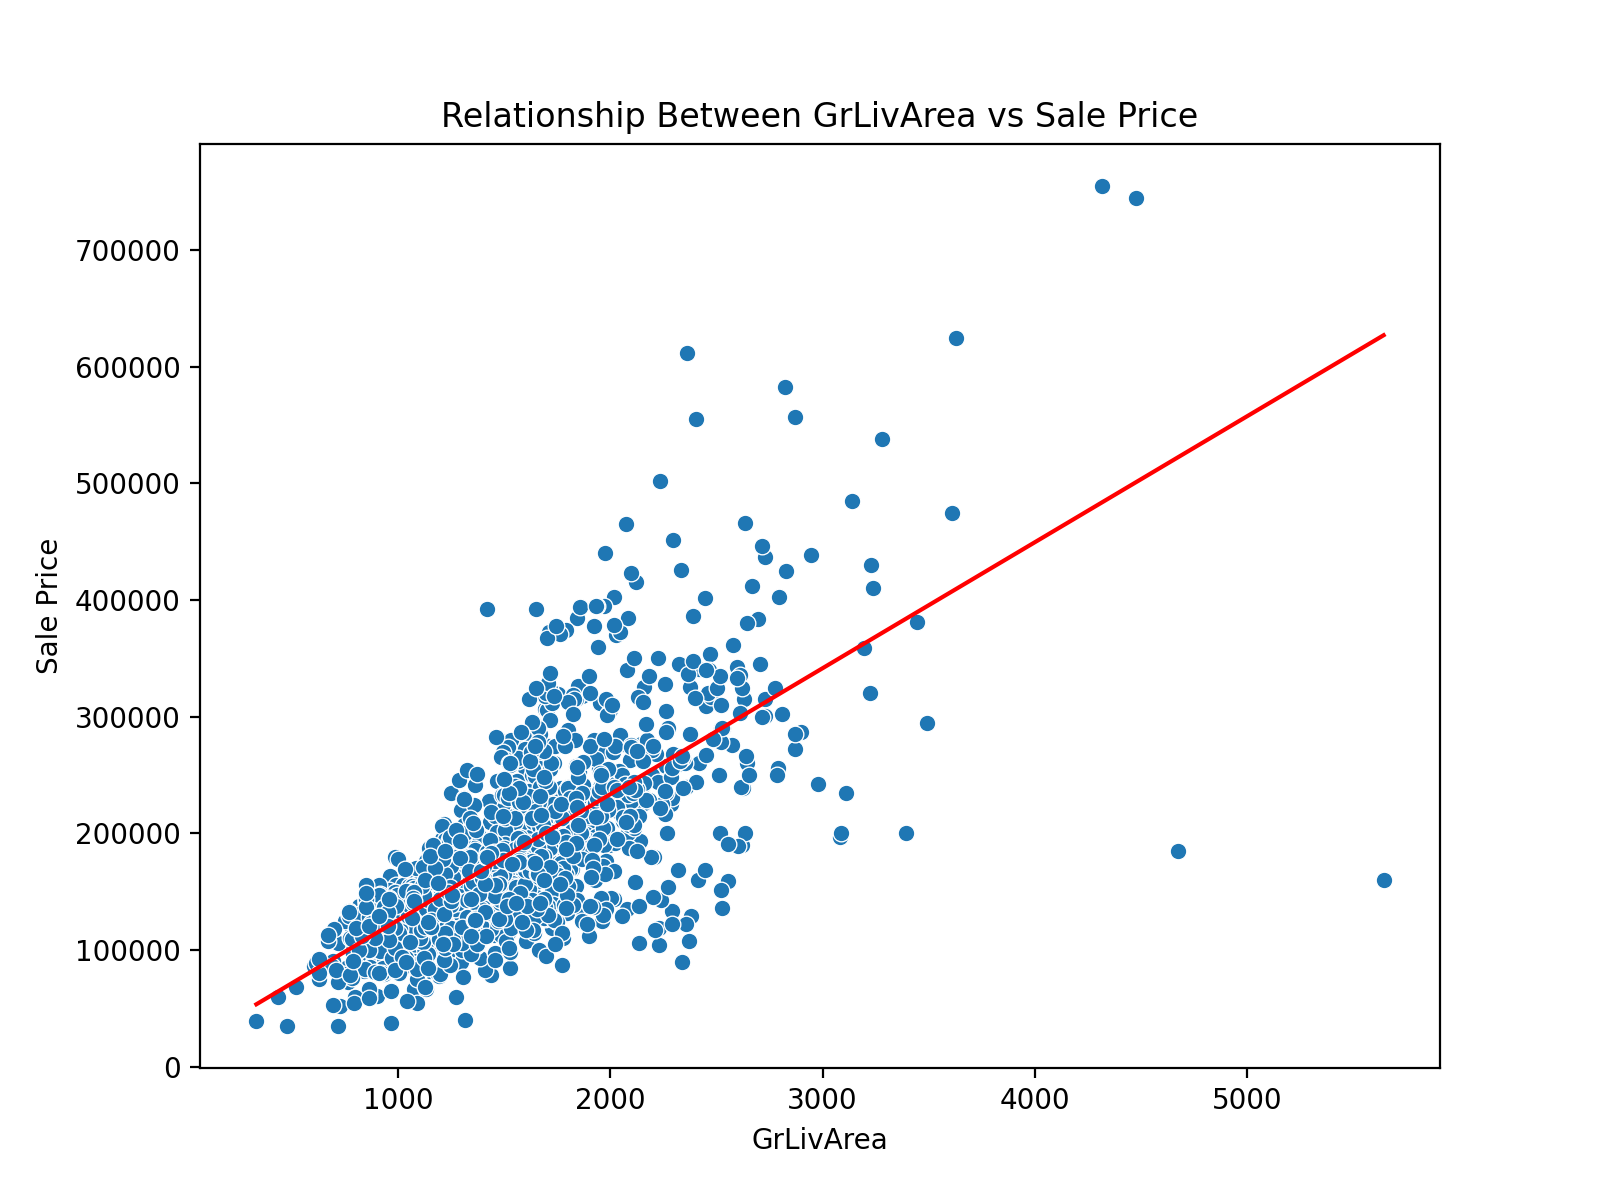

Variability Explained by the Model: 0.52


In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=slm.predict(x.reshape(-1,1)),color="red")
plt.title("Relationship Between GrLivArea vs Sale Price")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.show()
print("Variability Explained by the Model: {}".format(r2(m.r2_score(y_test, ypred))))

# Simple Linear Regression - Outliers Removed

<IPython.core.display.Javascript object>


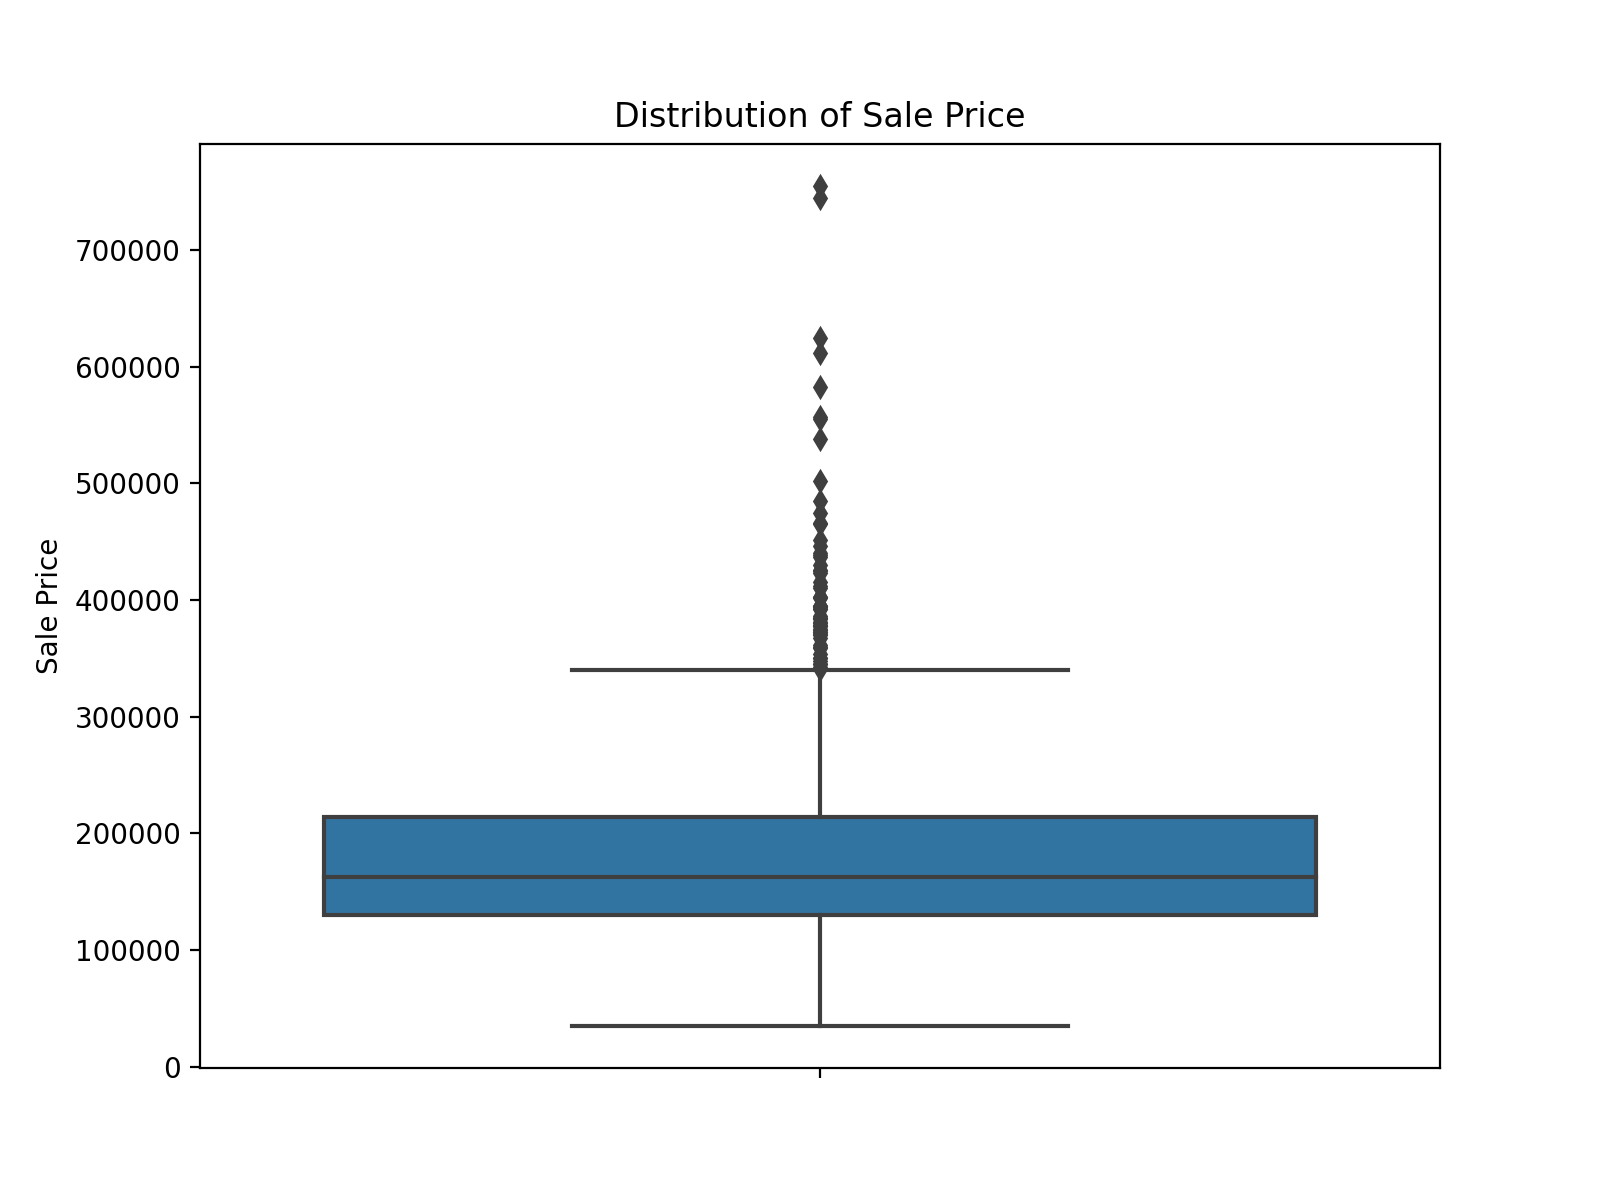

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(y=y)
plt.title("Distribution of Sale Price")
plt.ylabel("Sale Price")
plt.show()

In [20]:
q1 = np.percentile(y,25,interpolation="midpoint")
q3 = np.percentile(y,75,interpolation="midpoint")

iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

upper_index = np.where(hd.SalePrice >= upper)[0]
lower_index = np.where(hd.SalePrice <= lower)[0]

hd.drop(upper_index,inplace=True)
hd.drop(lower_index,inplace=True)

hd.reset_index(inplace=True)

In [21]:
q1

129950.0

In [22]:
q3

214000.0

In [23]:
iqr

84050.0

<IPython.core.display.Javascript object>


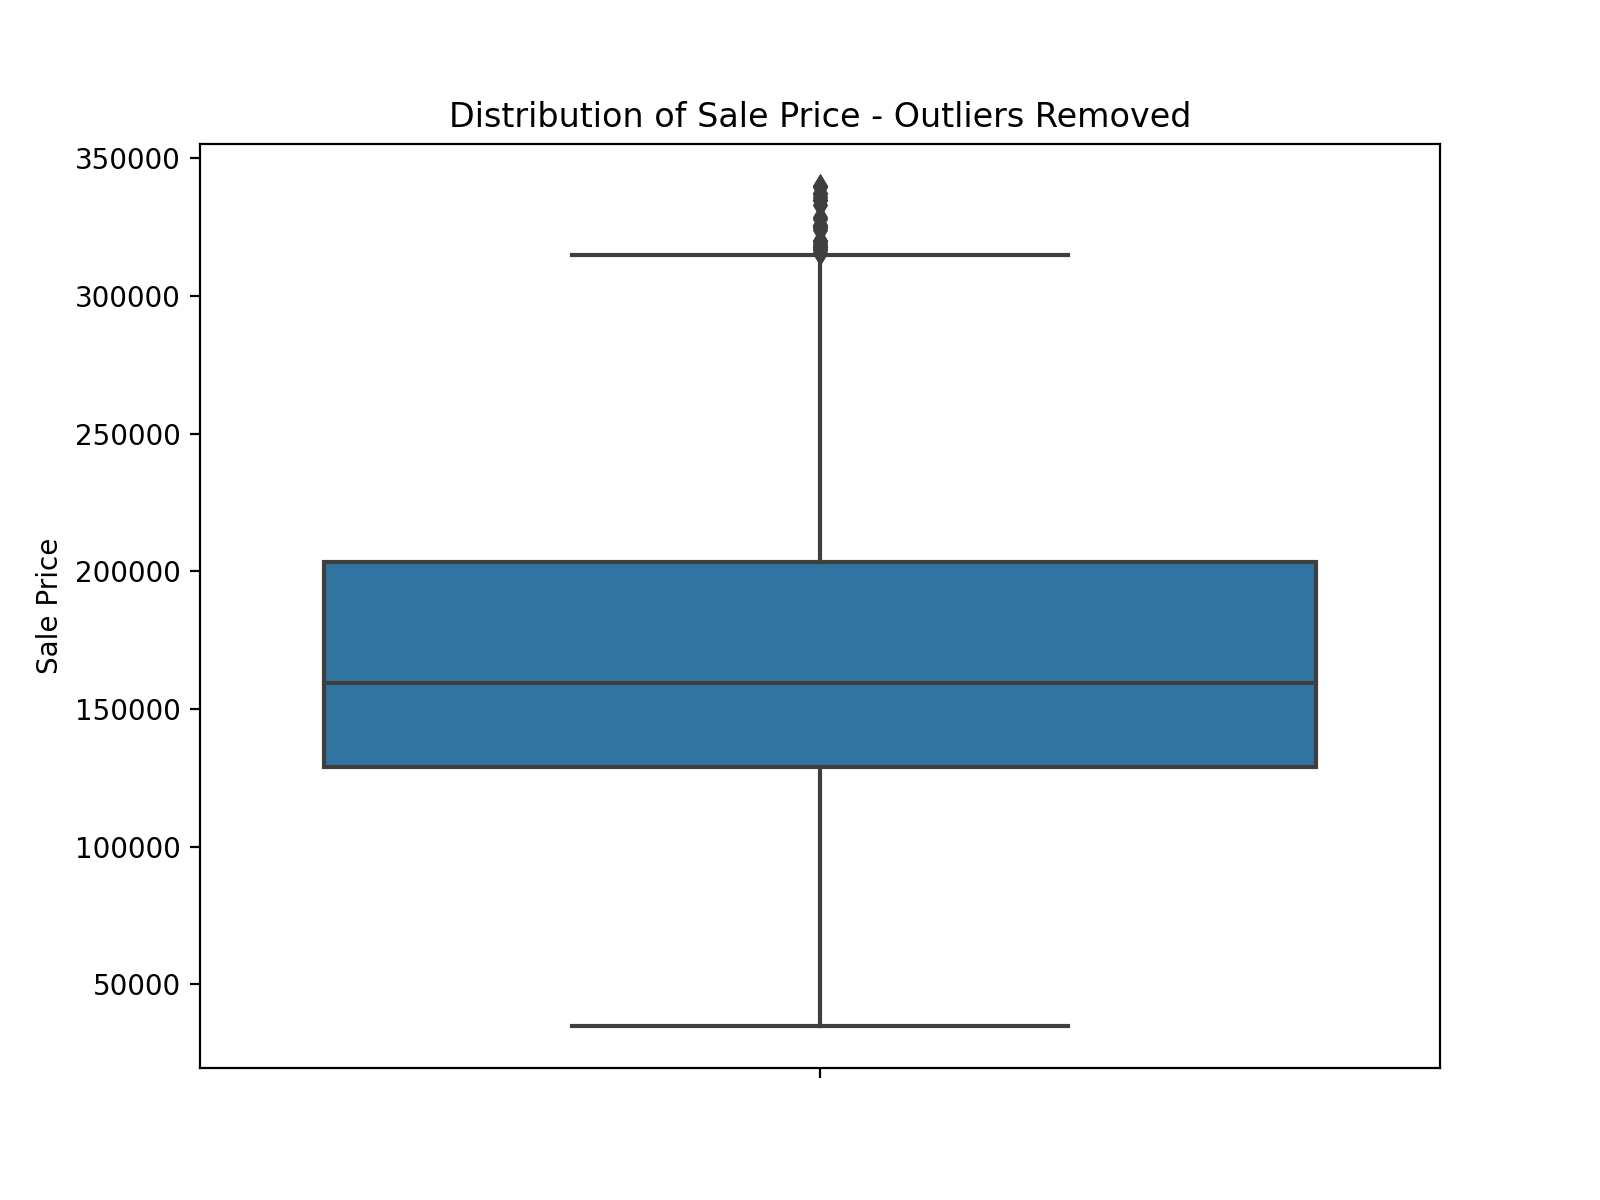

In [24]:
plt.figure(figsize=(8,6))
sns.boxplot(y=hd.SalePrice)
plt.title("Distribution of Sale Price - Outliers Removed")
plt.ylabel("Sale Price")
plt.show()

In [25]:
hd.shape

(1399, 76)

<IPython.core.display.Javascript object>


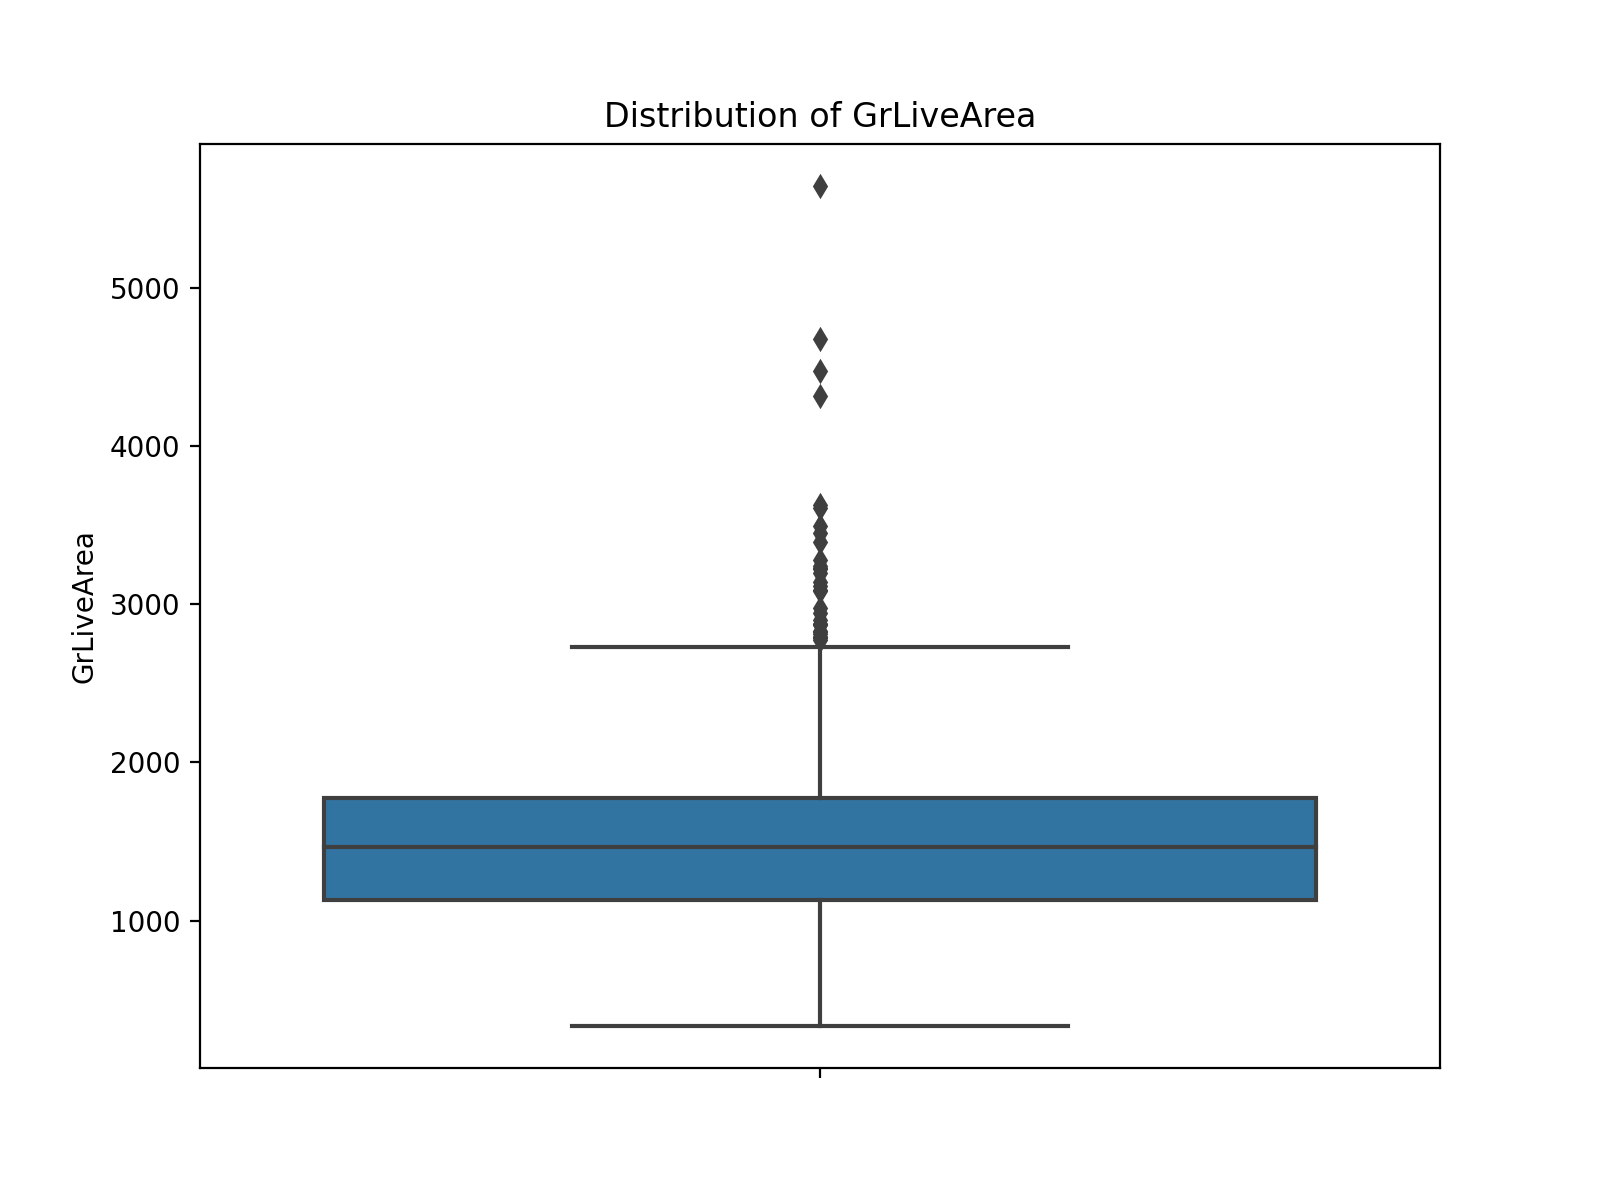

In [26]:
plt.figure(figsize=(8,6))
sns.boxplot(y=x)
plt.title("Distribution of GrLiveArea")
plt.ylabel("GrLiveArea")
plt.show()

In [27]:
q1 = np.percentile(x,25,interpolation="midpoint")
q3 = np.percentile(x,75,interpolation="midpoint")

iqr = q3 - q1

upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

upper_index = np.where(hd.GrLivArea >= upper)[0]
lower_index = np.where(hd.GrLivArea <= lower)[0]

hd.drop(upper_index,inplace=True)
hd.drop(lower_index,inplace=True)

hd.reset_index(inplace=True)

<IPython.core.display.Javascript object>


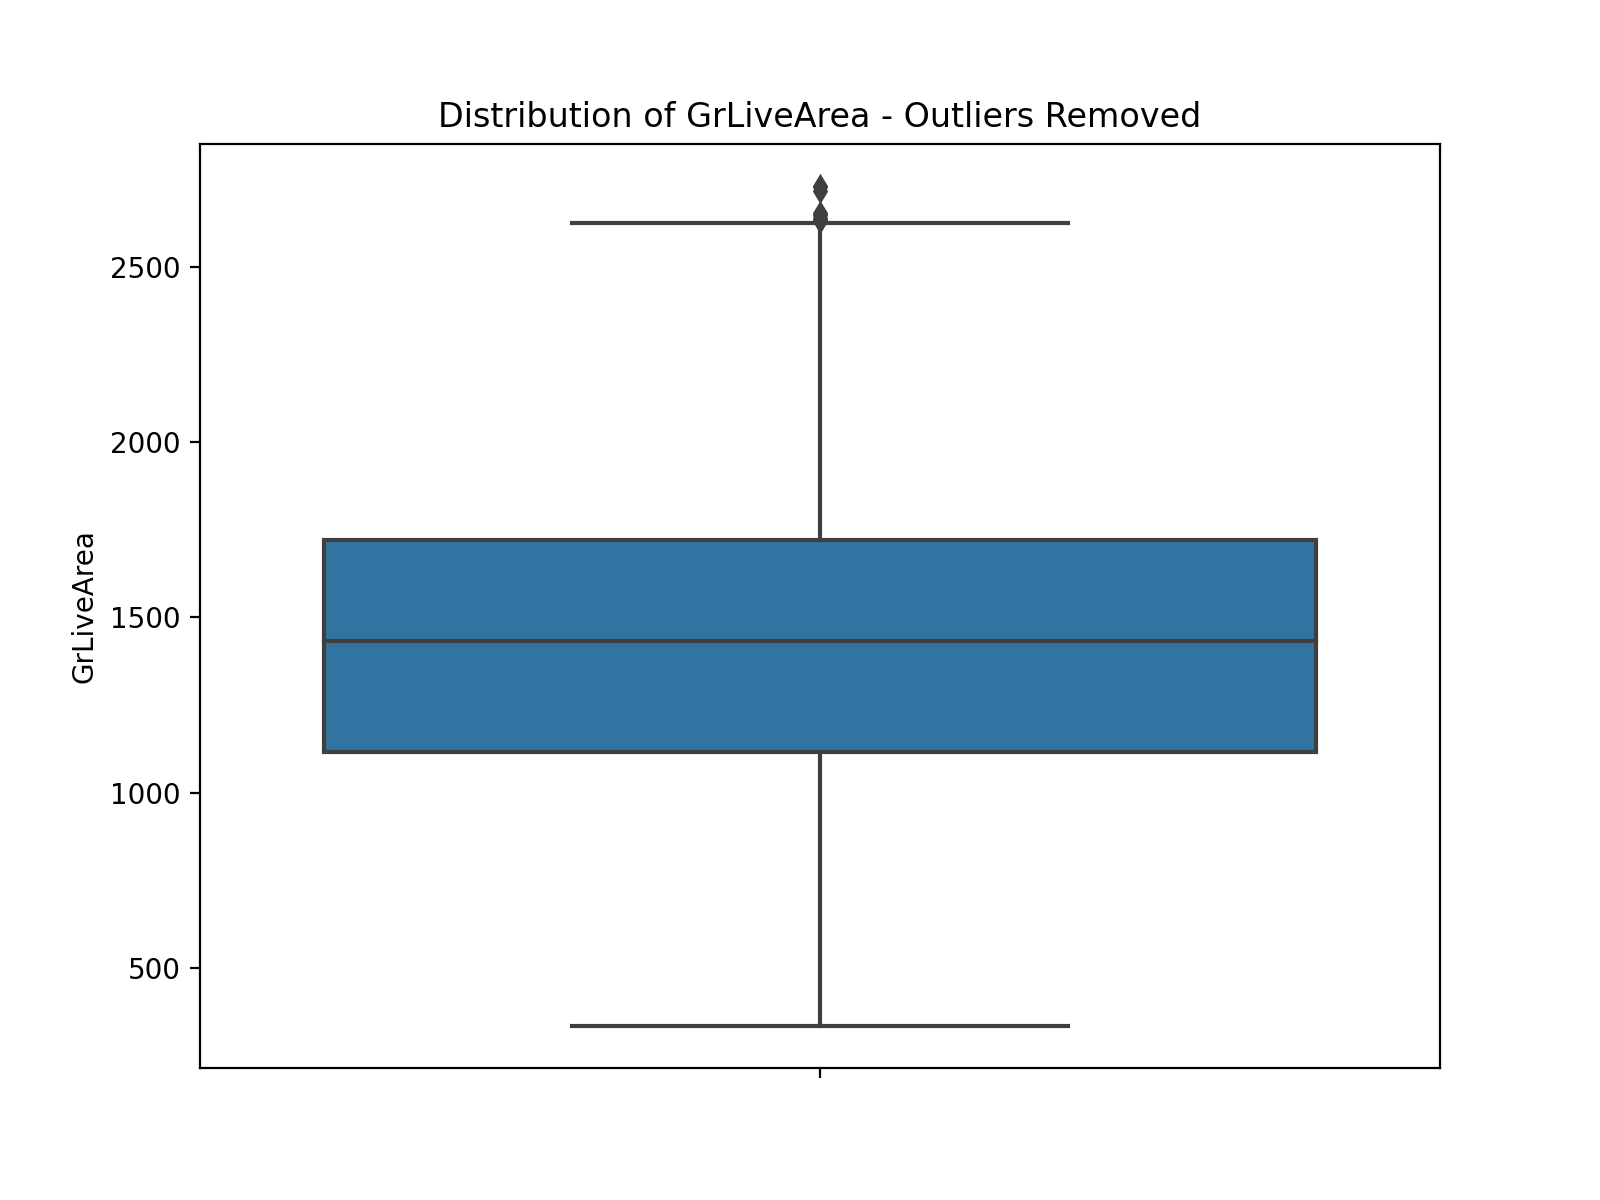

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(y=hd.GrLivArea)
plt.title("Distribution of GrLiveArea - Outliers Removed")
plt.ylabel("GrLiveArea")
plt.show()

In [29]:
x = hd.GrLivArea.values
y = hd.SalePrice.values

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=112)

slm = LinearRegression()

slm.fit(X_train.reshape(-1,1),y_train)

ypred = slm.predict(X_test.reshape(-1,1))

<IPython.core.display.Javascript object>


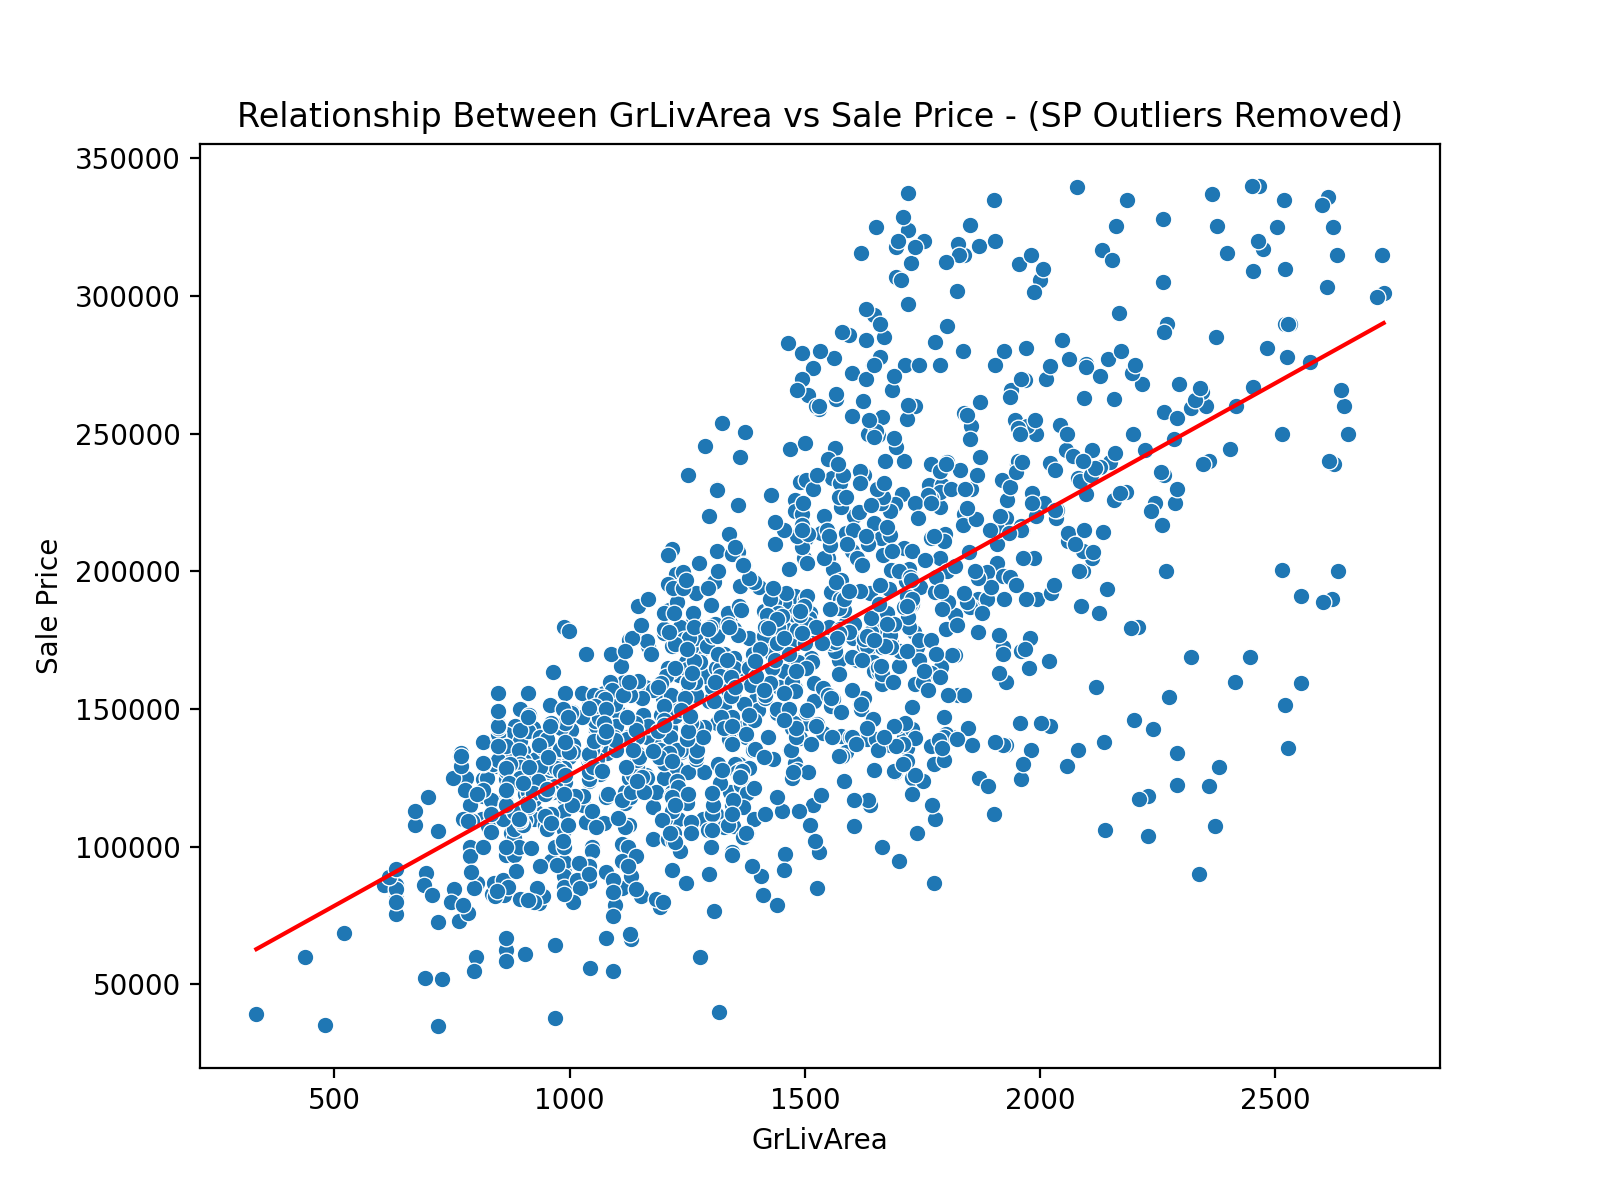

Variability Explained by the Model: 0.49


In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=slm.predict(x.reshape(-1,1)),color="red")
plt.title("Relationship Between GrLivArea vs Sale Price - (SP Outliers Removed)")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.show()
print("Variability Explained by the Model: {}".format(r2(m.r2_score(y_test, ypred))))

In [31]:
slm_r2 = r2(m.r2_score(y_test, ypred))

# Polynomial Regression - Outliers Removed

In [32]:
poly = PolynomialFeatures(degree=3)

In [33]:
x_poly = poly.fit_transform(x.reshape(-1,1))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.25, random_state=112)

In [35]:
plm = LinearRegression()

In [36]:
plm.fit(X_train,y_train)

LinearRegression()

In [37]:
ypred = plm.predict(X_test)

<IPython.core.display.Javascript object>


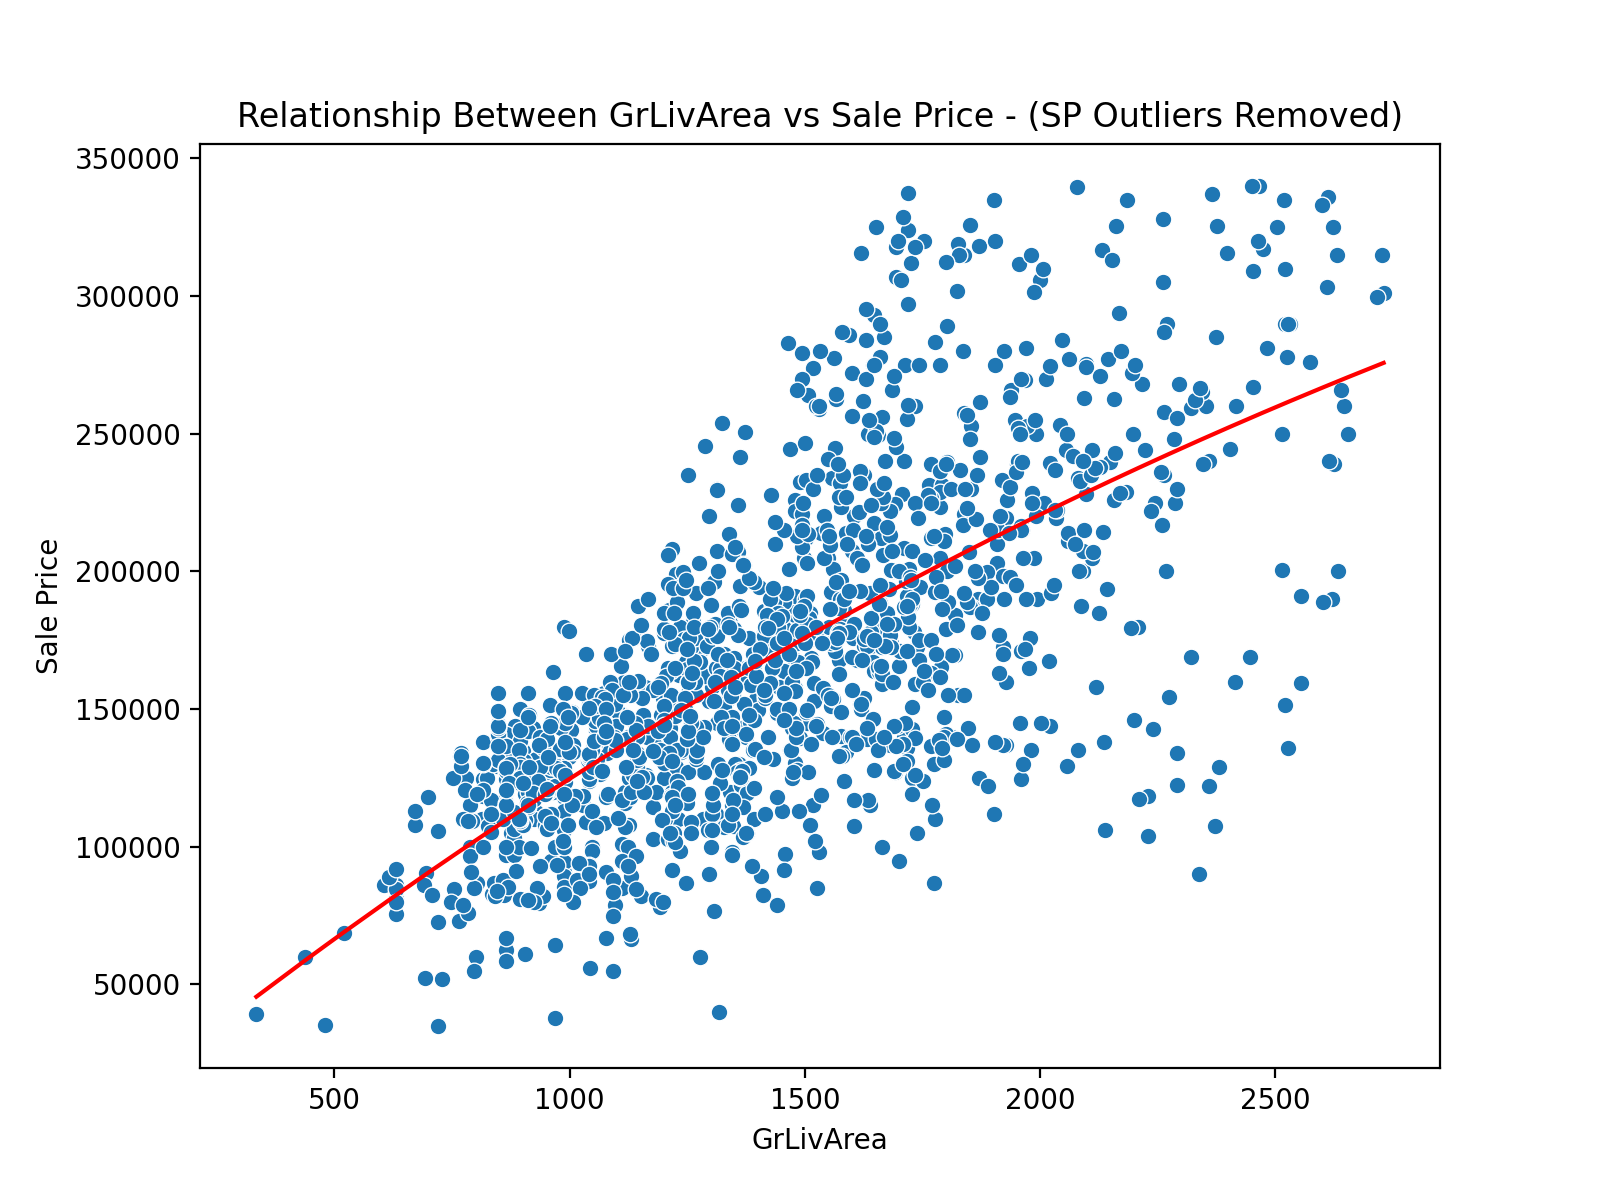

Variability Explained by the Model: 0.5


In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x, y=plm.predict(x_poly),color="red")
plt.title("Relationship Between GrLivArea vs Sale Price - (SP Outliers Removed)")
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.show()
print("Variability Explained by the Model: {}".format(r2(m.r2_score(y_test, ypred))))

In [39]:
poly_r2 = r2(m.r2_score(y_test, ypred))

# Multiple Linear Regression

In [40]:
len(hd.select_dtypes(["int","float"]).columns)

39

In [41]:
numerical_columns = (
hd.select_dtypes(["int","float"])
    .drop(columns=['YearBuilt', 'YearRemodAdd','YrSold','MoSold'])
    .dropna(how="any")
)

In [42]:
X = numerical_columns.iloc[:,:-1]
y = numerical_columns.iloc[:,-1]

X = sm.add_constant(X)

model = sm.OLS(y,X)

results = model.fit()

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        14:37:44   Log-Likelihood:                -11986.
No. Observations:                1053   AIC:                         2.404e+04
Df Residuals:                    1020   BIC:                         2.420e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.731e+05   8.48e+04     -7.934      0.000    -8.4e+05   -5.07e+05
level_0        -240.8874    236.044     -1.021      0.308    -704.075     222.300
index           228.8867    225.558      1.015      0.310    -213.724     671.497
MSSubClass      -76.6517     20.950     -3.659      0.000    -117.762     -35.541
LotFrontage     103.4883     39.903      2.593      0.010      25.187     181.790
LotArea           1.0824      0.190      5.706      0.000       0.710       1.455
OverallQual    1.548e+04    880.380     17.586      0.000    1.38e+04    1.72e+04
OverallCond    5332.7001    705.951      7.554      0.000    3947.417    6717.983
MasVnrArea       11.7936      4.596      2.566      0.010       2.776      20.812
BsmtFinSF1       16.2502      1.994      8.148      0.000      12.337      20.164
BsmtFinSF2        0.2290      3.326      0.069      0.945      -6.297       6.755
BsmtUnfSF         0.9418      1.775      0.531      0.596      -2.541       4.425
TotalBsmtSF      17.4210      2.614      6.665      0.000      12.292      22.550
1stFlrSF         21.4341      5.666      3.783      0.000      10.316      32.552
2ndFlrSF         23.6726      5.333      4.439      0.000      13.207      34.138
LowQualFinSF    -22.0522     14.469     -1.524      0.128     -50.444       6.340
GrLivArea        23.0545      5.251      4.391      0.000      12.751      33.358
BsmtFullBath   6015.7921   1922.305      3.129      0.002    2243.666    9787.918
BsmtHalfBath  -2499.8598   3050.751     -0.819      0.413   -8486.326    3486.607
FullBath       8654.7549   2039.873      4.243      0.000    4651.927    1.27e+04
HalfBath       3108.3086   1965.242      1.582      0.114    -748.070    6964.687
BedroomAbvGr  -6816.9986   1321.631     -5.158      0.000   -9410.425   -4223.572
KitchenAbvGr  -2.232e+04   3965.675     -5.629      0.000   -3.01e+04   -1.45e+04
TotRmsAbvGrd    545.8693    957.326      0.570      0.569   -1332.684    2424.423
Fireplaces     3379.9977   1344.945      2.513      0.012     740.822    6019.174
GarageYrBlt     312.6517     43.199      7.237      0.000     227.882     397.421
GarageCars     6981.8996   2139.152      3.264      0.001    2784.258    1.12e+04
GarageArea        9.2762      7.512      1.235      0.217      -5.464      24.017
WoodDeckSF       11.5927      6.258      1.853      0.064      -0.687      23.872
OpenPorchSF      41.4414     12.499      3.316      0.001      16.915      65.968
EnclosedPorch   -15.4330     12.100     -1.275      0.202     -39.178       8.312
3SsnPorch       -14.4216     23.439     -0.615      0.539     -60.416      31.573
ScreenPorch      16.4285     13.116      1.253      0.211      -9.309      42.166
PoolArea         18.8122     25.150      0.748      0.455     -30.539      68.163
MiscVal          -3.2396      4.383     -0.739   

In [44]:
numerical_columns = numerical_columns.drop(columns=["level_0","index","BsmtFinSF2","BsmtUnfSF"
                                                   ,"LowQualFinSF","BsmtHalfBath","HalfBath"
                                                   ,"TotRmsAbvGrd","GarageArea","EnclosedPorch"
                                                   ,"3SsnPorch","ScreenPorch","PoolArea","MiscVal"])

In [45]:
X = numerical_columns.iloc[:,:-1]
y = numerical_columns.iloc[:,-1]

X = sm.add_constant(X)

model = sm.OLS(y,X)

results = model.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 25 May 2022   Prob (F-statistic):               0.00
Time:                        14:37:44   Log-Likelihood:                -11992.
No. Observations:                1053   AIC:                         2.403e+04
Df Residuals:                    1032   BIC:                         2.413e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -7.342e+05   7.85e+04     -9.352      0.000   -8.88e+05    -5.8e+05
MSSubClass     -77.0169     20.772     -3.708      0.000    -117.778     -36.256
LotFrontage    104.2244     39.596      2.632      0.009      26.527     181.922
LotArea          1.1300      0.188      5.996      0.000       0.760       1.500
OverallQual   1.556e+04    871.478     17.853      0.000    1.38e+04    1.73e+04
OverallCond   5260.7153    691.387      7.609      0.000    3904.030    6617.400
MasVnrArea      13.4503      4.554      2.954      0.003       4.515      22.386
BsmtFinSF1      15.4862      2.358      6.567      0.000      10.859      20.114
TotalBsmtSF     18.5640      3.210      5.783      0.000      12.265      24.863
1stFlrSF        43.3515     19.598      2.212      0.027       4.894      81.809
2ndFlrSF        47.9270     19.233      2.492      0.013      10.186      85.668
GrLivArea        2.2841     19.048      0.120      0.905     -35.093      39.662
BsmtFullBath  6170.3166   1771.709      3.483      0.001    2693.753    9646.880
FullBath      7549.8334   1889.285      3.996      0.000    3842.554    1.13e+04
BedroomAbvGr -6525.3503   1198.454     -5.445      0.000   -8877.034   -4173.666
KitchenAbvGr -2.188e+04   3797.459     -5.762      0.000   -2.93e+04   -1.44e+04
Fireplaces    3621.3685   1318.720      2.746      0.006    1033.690    6209.047
GarageYrBlt    344.1704     39.887      8.629      0.000     265.902     422.438
GarageCars    8884.5015   1534.031      5.792      0.000    5874.327    1.19e+04
WoodDeckSF      11.1369      6.139      1.814      0.070      -0.909      23.182
OpenPorchSF     45.9757     12.375      3.715      0.000      21.692      70.259
==============================================================================
Omnibus:                       71.018   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.922
Skew:                          -0.276   Prob(JB):                     8.74e-50
Kurtosis:                       5.201   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [48]:
mvlm = LinearRegression()

In [49]:
mvlm.fit(X_train,y_train)

LinearRegression()

In [50]:
ypred = mvlm.predict(X_test)

In [51]:
mvlm_r2 = r2(m.r2_score(y_test,ypred))

In [52]:
mvlm_r2

0.87

# Support Vector Machine

In [53]:
svr_model = SVR(kernel="rbf")

In [54]:
X_sc = StandardScaler()
y_sc = StandardScaler()

In [55]:
X = numerical_columns.iloc[:,:-1].values
y = numerical_columns.iloc[:,-1].values

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [57]:
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.fit_transform(X_test)
y_train = y_sc.fit_transform(y_train.reshape(-1,1))

In [58]:
svr_model.fit(X_train,y_train)

SVR()

In [59]:
ypred = y_sc.inverse_transform(svr_model.predict(X_test))

In [60]:
svr_r2 = r2(m.r2_score(y_test,ypred))

In [61]:
svr_r2

0.85

# Decision Tree

In [62]:
X = numerical_columns.iloc[:,:-1].values
y = numerical_columns.iloc[:,-1].values

In [63]:
dt_model = DecisionTreeRegressor(random_state=112)

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [65]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=112)

In [66]:
ypred = dt_model.predict(X_test)

In [67]:
dt_r2 = r2(m.r2_score(y_test,ypred))

In [68]:
dt_r2

0.72

# Random Forest

In [69]:
X = numerical_columns.iloc[:,:-1].values
y = numerical_columns.iloc[:,-1].values

In [70]:
forest_model = RandomForestRegressor(n_estimators=100 ,random_state=112)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=112)

In [72]:
forest_model.fit(X_train,y_train)

RandomForestRegressor(random_state=112)

In [73]:
ypred = forest_model.predict(X_test)

In [74]:
forest_r2 = r2(m.r2_score(y_test,ypred))

In [75]:
forest_r2

0.85

In [76]:
regress_model_score = (namedtuple(
                      "Regression_Model_Scores",["Simple_Linear", "Polynomial_Regress"
                                                ,"Multivariate_Linear", "Support_Vector"
                                                ,"Decision_Tree", "Random_Forest"])
                      )

In [77]:
regress_model_score = regress_model_score(slm_r2,poly_r2,mvlm_r2,svr_r2,dt_r2,forest_r2)

In [78]:
regress_model_score

Regression_Model_Scores(Simple_Linear=0.49, Polynomial_Regress=0.5, Multivariate_Linear=0.87, Support_Vector=0.85, Decision_Tree=0.72, Random_Forest=0.85)